In [1]:
!pip install openpyxl
!pip install lifetimes

  Using cached Lifetimes-0.11.3-py3-none-any.whl (584 kB)
  Obtaining dependency information for autograd>=1.2.0 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   --------------------------------- ------ 41.0/49.3 kB 393.8 kB/s eta 0:00:01
   --------------------------------- ------ 41.0/49.3 kB 393.8 kB/s eta 0:00:01
   --------------------------------- ------ 41.0/49.3 kB 393.8 kB/s eta 0:00:01
   --------------------------------- ------ 41.0/49.3 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 49.3/49.3 kB 166.7 kB/s eta 0:00:00


In [2]:
pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/96.5 kB 220.2 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.5 kB 219.4 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 438.1 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 438.1 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 438.1 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 438.1 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 438.1 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 221.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Loading the required libraries
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading the online retail dataset
df_ = pd.read_excel('Online Retail.xlsx',sheet_name='Online Retail')

# Copying the online retail dataset 
df_= df_[df_["Country"]=="United Kingdom"]
df = df_.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Data preparation step 1: Removing null oberservations
df.dropna(inplace=True)

# Data preparation step 1: Removing canceled orders 
df = df[~df["InvoiceNo"].str.contains("C", na=False)]
df = df[df["Quantity"] > 0]

df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,min,1%,25%,50%,75%,99%,max,std
Quantity,354345.0,12.048913,1.0,1.0,2.0,4.0,12.0,100.0,80995.0,190.428127
InvoiceDate,354345,2011-07-11 08:05:04.229606656,2010-12-01 08:26:00,2010-12-02 17:48:00,2011-04-07 11:40:00,2011-07-31 15:31:00,2011-10-23 13:49:00,2011-12-07 13:53:00,2011-12-09 12:49:00,NaN
UnitPrice,354345.0,2.963793,0.0,0.21,1.25,1.95,3.75,12.75,8142.75,17.862067
CustomerID,354345.0,15552.436219,12346.0,12748.0,14194.0,15522.0,16931.0,18223.0,18287.0,1594.546025


In [6]:
# Defining functions for outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Defining functions to replace outliers
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [7]:
# Data preparation step 2: Replacing outliers in the Quantity and Price columns with the upper limit
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "UnitPrice")

df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,min,1%,25%,50%,75%,99%,max,std
Quantity,354345.0,10.676869,1.0,1.0,2.0,4.0,12.0,100.0,248.5,22.075531
InvoiceDate,354345,2011-07-11 08:05:04.229606656,2010-12-01 08:26:00,2010-12-02 17:48:00,2011-04-07 11:40:00,2011-07-31 15:31:00,2011-10-23 13:49:00,2011-12-07 13:53:00,2011-12-09 12:49:00,NaN
UnitPrice,354345.0,2.815039,0.0,0.21,1.25,1.95,3.75,12.75,31.56,2.920551
CustomerID,354345.0,15552.436219,12346.0,12748.0,14194.0,15522.0,16931.0,18223.0,18287.0,1594.546025


In [8]:
# Data preparation step 3: Calculating total price per transaction 
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
today_date = dt.datetime(2011, 12, 11)

In [9]:
# Defining today date as max(InvoiceDate) + 2 days
today_date = dt.datetime(2011, 12, 11)
print(f" Maximum invoice date: {df.InvoiceDate.max()} \n Today date: {today_date}")

 Maximum invoice date: 2011-12-09 12:49:00 
 Today date: 2011-12-11 00:00:00


In [10]:
# Calculating recency, monetary, frequency and tenure metrics
rfm = df.groupby("CustomerID").agg({"InvoiceDate": [lambda date: (date.max() - date.min()).days,
                                                     lambda date: (today_date - date.min()).days],
                                     "InvoiceNo": lambda num: num.nunique(),
                                      "TotalPrice": lambda price: price.sum()}) #total price per customer

rfm.columns = rfm.columns.droplevel(0)
rfm.columns = ['Recency', "T", 'Frequency', "Monetary"]

# Calculating average monetary values per order:
rfm["Monetary"] = rfm["Monetary"] / rfm["Frequency"]

rfm.head()

,Recency,T,Frequency,Monetary
CustomerID,,,,
12346.0,0,326,1,258.440000
12747.0,366,370,11,381.455455
12748.0,372,374,210,153.828143
12749.0,209,214,5,814.488000
12820.0,323,327,4,235.585000


In [11]:
# Removing one-time purchases from dataset
rfm = rfm[(rfm['Frequency'] > 1)]

# Copying dataset
cltv = rfm.copy()
rfm.head()

,Recency,T,Frequency,Monetary
CustomerID,,,,
12747.0,366,370,11,381.455455
12748.0,372,374,210,153.828143
12749.0,209,214,5,814.488000
12820.0,323,327,4,235.585000
12822.0,16,88,2,474.440000


In [12]:
# Loading the required libraries
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix

In [13]:
# Checking BG/NBD model assumption and requirements
print(cltv[['Monetary', 'Recency']].corr())  # Correlation between monetary ve recency variables
cltv["Frequency"] = cltv["Frequency"].astype(int) # Type of frequency variable should be integer for BG-NBD model

          Monetary   Recency
Monetary  1.000000  0.100232
Recency   0.100232  1.000000


In [14]:
# Creating BG-NBD Model
bgf = BetaGeoFitter(penalizer_coef=0.001) # model object
bgf.fit(cltv['Frequency'], cltv['Recency'], cltv['T']) # model fitting

# Prediction of expected number of transaction for each customer for one year (365 days)
cltv['Ex_No_of_Purchases'] = bgf.predict(365, cltv['Frequency'], cltv['Recency'], cltv['T']) 
cltv.sort_values("Ex_No_of_Purchases",ascending=False).head()

,Recency,T,Frequency,Monetary,Ex_No_of_Purchases
CustomerID,,,,,
12748.0,372,374,210,153.828143,163.484153
17841.0,371,374,124,328.822339,97.154255
13089.0,366,370,97,605.186598,76.967203
14606.0,372,374,93,129.961613,73.307513
15311.0,373,374,91,667.596813,71.791035


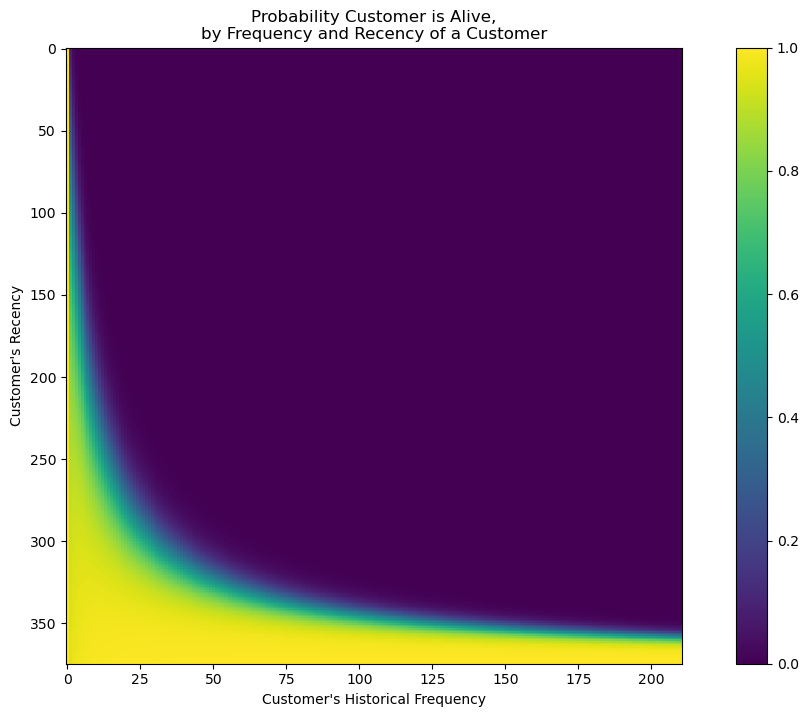

In [15]:
%matplotlib inline
# set figure size
plt.subplots(figsize=(14, 8))
plot_probability_alive_matrix(bgf)
plt.show()

In [16]:
# Creating Gamma-Gamma Model
ggf = GammaGammaFitter(penalizer_coef=0.01) # model object
ggf.fit(cltv['Frequency'], cltv['Monetary']) # model fitting

# Prediction of expected amount of average profit
cltv["Ex_Avg_Order_Value"] = ggf.conditional_expected_average_profit(cltv['Frequency'], cltv['Monetary'])

cltv.head()

,Recency,T,Frequency,Monetary,Ex_No_of_Purchases,Ex_Avg_Order_Value
CustomerID,,,,,,
12747.0,366,370,11,381.455455,10.160838,387.822846
12748.0,372,374,210,153.828143,163.484153,153.971325
12749.0,209,214,5,814.488000,8.251756,844.094697
12820.0,323,327,4,235.585000,5.193049,247.080949
12822.0,16,88,2,474.440000,6.194078,520.828195


In [17]:
# Calculating customer lifetime value by using BG-NBD and GammaGamma models: 

cltv["CLTV_Next_Year"] = ggf.customer_lifetime_value(bgf,
                                   cltv['Frequency'],
                                   cltv['Recency'],
                                   cltv['T'],
                                   cltv['Monetary'],
                                   time=12,  # 12 month
                                   freq="D",  # frequency of T
                                   discount_rate=0.01)

cltv.sort_values("CLTV_Next_Year",ascending=False).head()

,Recency,T,Frequency,Monetary,Ex_No_of_Purchases,Ex_Avg_Order_Value,CLTV_Next_Year
CustomerID,,,,,,,
18102.0,366,368,60,3584.887750,48.483656,3595.192557,161426.953548
14096.0,97,102,17,3159.077059,35.003525,3191.386734,103542.783180
17450.0,359,368,46,2629.529891,37.419820,2639.419342,91468.077494
17511.0,370,374,31,2921.951935,25.487851,2938.274487,69355.732336
16684.0,353,359,28,2120.046964,23.920317,2133.203588,47257.217794


In [18]:
cltv.sort_values("CLTV_Next_Year").head()

,Recency,T,Frequency,Monetary,Ex_No_of_Purchases,Ex_Avg_Order_Value,CLTV_Next_Year
CustomerID,,,,,,,
17850.0,1,374,34,156.470000,1.182400e-23,157.371454,1.723243e-21
15107.0,61,373,6,53.250000,2.958310e-02,55.454741,1.519349e+00
16725.0,69,372,7,111.574286,1.998953e-02,114.916054,2.127437e+00
17912.0,54,365,5,62.202000,5.740449e-02,65.180170,3.465340e+00
15881.0,52,365,5,100.278000,5.162359e-02,104.603939,5.001276e+00
